## K-Means Clustering 

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [67]:
data = pd.read_csv('Downloads\income.csv')

In [68]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
sc = MinMaxScaler()

In [71]:
sc.fit(data[['Income($)']])
data['Income($)'] = sc.transform(data[['Income($)']])
data['Age'] = sc.fit_transform(data[['Age']])
data.head(10)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


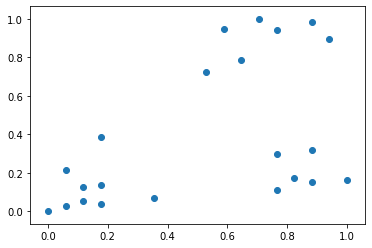

In [72]:
plt.scatter(data.Age, data['Income($)'])

In [73]:
km = KMeans(n_clusters = 3)

In [74]:
df = data.drop('Name', axis=1)
df.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [75]:
pred = km.fit_predict(df)
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [76]:
df['cluster'] = pred
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [77]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [78]:
df3

,Age,Income($),cluster
16,0.823529,0.170940,2
17,0.882353,0.153846,2
18,1.000000,0.162393,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2
21,0.764706,0.111111,2


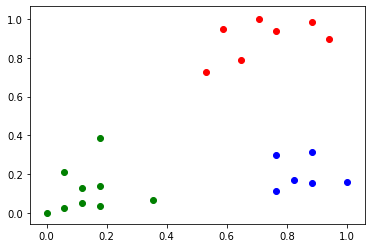

In [79]:
plt.scatter(df1.Age, df1['Income($)'], color='r')
plt.scatter(df2.Age, df2['Income($)'], color='g')
plt.scatter(df3.Age, df3['Income($)'], color='b')

In [80]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

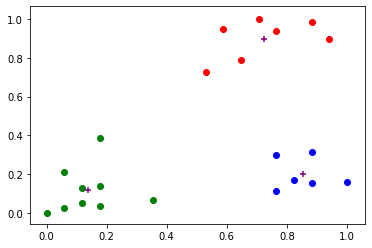

In [81]:
plt.scatter(df1.Age, df1['Income($)'], color='r')
plt.scatter(df2.Age, df2['Income($)'], color='g')
plt.scatter(df3.Age, df3['Income($)'], color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'purple', marker = '+')

ELBOW PLOT

In [82]:
k_rng = len(df.Age)
k_rng

22

In [83]:
sse=[]
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [84]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22443334487241418,
 0.16858512236029757,
 0.13265419827245162,
 0.10663983840905436]

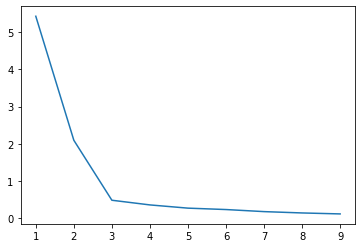

In [85]:
plt.plot(range(1,10),sse)

### IRIS_DATASET 

In [86]:
from sklearn import datasets

In [101]:
data = datasets.load_iris()

In [102]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [103]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [104]:
df = df.drop(['petal length (cm)','petal width (cm)'],axis=1)
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [105]:
df['sepal length (cm)'] = sc.fit_transform(df[['sepal length (cm)']])
df['sepal width (cm)'] = sc.fit_transform(df[['sepal width (cm)']]) 

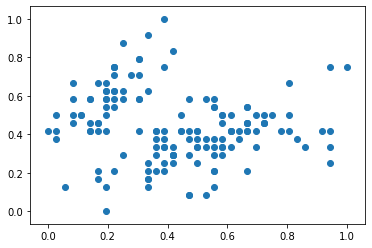

In [106]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [107]:
k_rng = range(1,20)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [108]:
sse

[12.797757201646089,
 6.8552905260332775,
 4.115194202754065,
 3.274100597963394,
 2.566429602372423,
 2.110111414676365,
 1.8174606208522128,
 1.5448647207023938,
 1.2880625948295983,
 1.1122861870773997,
 0.9575669719405252,
 0.8478325357920946,
 0.764923171776242,
 0.7210079763034737,
 0.6578924446646757,
 0.610324161221152,
 0.5909868503489055,
 0.5411572807550817,
 0.506703659155916]

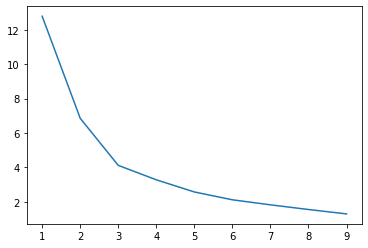

In [113]:
plt.plot(range(1,10),sse[:9])

In [114]:
model = KMeans(n_clusters=3)
pred = model.fit_predict(df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [115]:
df['cluster'] = pred
df.head(5)

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


In [116]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

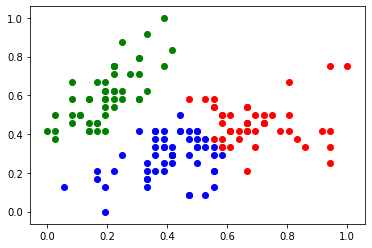

In [117]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='r')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='g')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color='b')

In [118]:
model.cluster_centers_

array([[0.69562648, 0.45390071],
       [0.19897959, 0.60459184],
       [0.40483539, 0.28009259]])

Text(0, 0.5, 'sepal width (cm)')

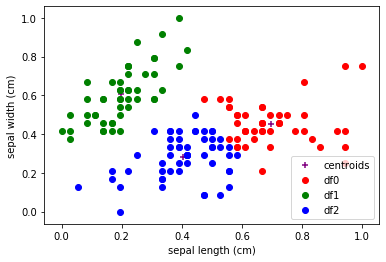

In [119]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='purple',marker='+', label='centroids')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='r',label='df0')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='g',label='df1')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color='b',label='df2')
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

## Hierarchical Clustering 

In [120]:
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np

In [130]:
data = datasets.make_blobs(n_samples=200,n_features=2,centers=4,
                          cluster_std=1.6, random_state=50)

In [131]:
pts=data[0]

In [132]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

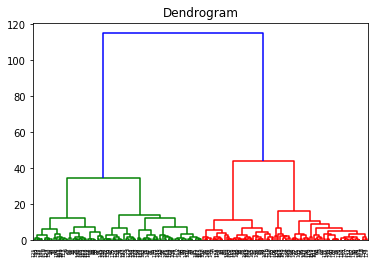

In [133]:
dendrogram = sch.dendrogram(sch.linkage(pts,method='ward'))
plt.title('Dendrogram')
plt.show()

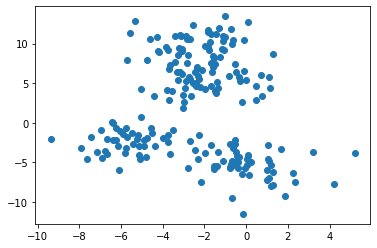

In [134]:
plt.scatter(data[0][:,0],data[0][:,1])

In [152]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage ='ward')

In [153]:
pred = hc.fit_predict(pts)

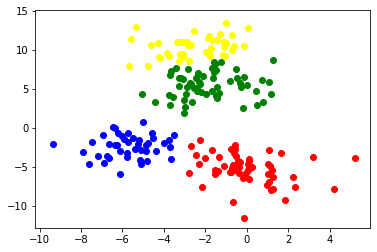

In [154]:
plt.scatter(pts[pred==0,0],pts[pred==0,1], color = 'red')
plt.scatter(pts[pred==1,0],pts[pred==1,1], color = 'green')
plt.scatter(pts[pred==2,0],pts[pred==2,1], color = 'blue')
plt.scatter(pts[pred==3,0],pts[pred==3,1], color = 'yellow')

In [155]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)